In [22]:

import os
from fabrictestbed.slice_manager import SliceManager, Status
import json

In [23]:

credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [24]:
slice_manager = SliceManager(oc_host=orchestrator_host, cm_host=credmgr_host, project_name='all', scope='all')

# Initialize the slice manager
slice_manager.initialize()

In [25]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Toplogy: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Toplogy: LBNL: { cpu: 6/6 , core: 180/192 , ram: 1,524/1,536 G, disk: 9,580/9,600 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 9,000/10,000 G, unit: 9/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 0/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
UKY
	Components:
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
	Site Interfaces:
RENC: { cpu: 6/6 , core: 188/192 , ram: 1,524/1,536 G, disk: 14,380/14,400 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit:

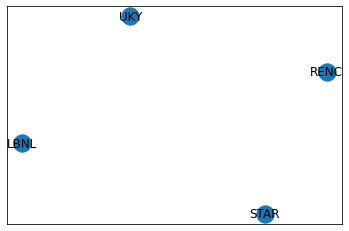

In [26]:

if status == Status.OK:
    advertised_topology.draw()

In [27]:
ssh_key_file_priv=os.environ['HOME']+"/.ssh/id_rsa"
ssh_key_file_pub=os.environ['HOME']+"/.ssh/id_rsa.pub"

ssh_key_pub = None
with open (ssh_key_file_pub, "r") as myfile:
    ssh_key_pub=myfile.read()
    ssh_key_pub=ssh_key_pub.strip()

ssh_key_priv = None
with open (ssh_key_file_priv, "r") as myfile:
    ssh_key_priv=myfile.read()
    ssh_key_priv=ssh_key_priv.strip()

In [38]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType
# Create topology
t = ExperimentTopology()

# Add node
n1 = t.add_node(name='n1', site='RENC')

# Set capacities
cap = Capacities()
cap.set_fields(core=6, ram=6, disk=10)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Add PCI devices
n1.add_component(ctype=ComponentType.NVME, model='P4510', name='c1')

# Add node
n2 = t.add_node(name='n2', site='RENC')

# Set properties
n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Shared Cards
n1.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n1-nic1')
n2.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n2-nic1')

# L2Bridge Service
t.add_network_service(name='bridge1', nstype=ServiceType.L2Bridge, interfaces=t.interface_list)

# Generate Slice Graph
slice_graph = t.serialize()


# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='iperf-test10', slice_graph=slice_graph, ssh_key=ssh_key_pub)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "80dbc5e8-51a0-4621-adda-59ae39ddc28f",
    "lease_end": "2021-09-10 17:39:00",
    "pending_state": "None_",
    "reservation_id": "b96454b1-0fdb-44ef-927e-9a88bb74e9d3",
    "reservation_state": "Unknown",
    "slice_id": "d77ae70b-5791-4d56-bf77-8967a25d8411"
}, {
    "graph_node_id": "a5a48d1c-f9f5-4f16-b6fe-6443f2bc1ddd",
    "lease_end": "2021-09-10 17:39:00",
    "pending_state": "None_",
    "reservation_id": "a0013cdb-e7c1-4ee8-8822-0ec6198693fe",
    "reservation_state": "Unknown",
    "slice_id": "d77ae70b-5791-4d56-bf77-8967a25d8411"
}, {
    "graph_node_id": "94a62002-9c8c-4519-954f-6a457fc8a8c3",
    "lease_end": "2021-09-10 17:39:00",
    "pending_state": "None_",
    "reservation_id": "46b06658-05d8-4f7b-a386-173467bf63cf",
    "reservation_state": "Unknown",
    "slice_id": "d77ae70b-5791-4d56-bf77-8967a25d8411"
}]


In [39]:
t.interface_list

({'capacities': '{ bw: 100 Gbps, unit: 1 }', 'labels': '{ local_name: p1}', 'name': 'n1-nic1-p1', 'type': 'DedicatedPort'},
 {'capacities': '{ bw: 100 Gbps, unit: 1 }', 'labels': '{ local_name: p2}', 'name': 'n1-nic1-p2', 'type': 'DedicatedPort'},
 {'capacities': '{ bw: 100 Gbps, unit: 1 }', 'labels': '{ local_name: p1}', 'name': 'n2-nic1-p1', 'type': 'DedicatedPort'},
 {'capacities': '{ bw: 100 Gbps, unit: 1 }', 'labels': '{ local_name: p2}', 'name': 'n2-nic1-p2', 'type': 'DedicatedPort'})

In [40]:
# Set the Slice ID from output of the above command
slice_id=reservations[0].slice_id

In [42]:
status, slices = slice_manager.slices()

print("Response Status {}".format(status))
if status == Status.OK:
    print("Slices {}".format(slices))
else:
    print(f"Failure: {slices}")

Response Status Status.OK
Slices [{
    "graph_id": "8213c06f-a96b-424b-9874-4866d94b0eaf",
    "lease_end": "2021-09-01 19:12:13",
    "slice_id": "9765dd97-1ac7-4953-94e6-c68dbec0b0a8",
    "slice_name": "iperf-test4",
    "slice_state": "Dead"
}, {
    "graph_id": "3c908078-d86e-4469-8c3b-1bfd37e31dc3",
    "lease_end": "2021-09-08 22:29:28",
    "slice_id": "f18afd8f-5a15-446b-ae2a-1eeaeb8434ec",
    "slice_name": "iperf-test7",
    "slice_state": "Closing"
}, {
    "graph_id": "608a969a-189e-473e-a4ea-e09c59851b3b",
    "lease_end": "2021-09-03 16:42:48",
    "slice_id": "8943327e-31db-4b9b-8808-430903ed1d1b",
    "slice_name": "iperf-test4",
    "slice_state": "Dead"
}, {
    "graph_id": "e90f6042-d2d0-41b7-ac3b-e77b596202a6",
    "lease_end": "2021-09-03 16:49:54",
    "slice_id": "9d7df0ad-1822-4e71-a7e1-4eec2be50315",
    "slice_name": "iperf-test5",
    "slice_state": "Closing"
}, {
    "graph_id": "c407076e-8c4a-4bd5-91a7-6ef066cec3d3",
    "lease_end": "2021-09-03 16:54:50"

In [43]:
status, slivers = slice_manager.slivers(slice_id=slice_id)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Slivers {}".format(slivers))
else:
    print(f"Failure: {slivers}")

Response Status Status.OK
Slivers [{
    "allocated_capacities": "{\"core\": 8, \"disk\": 10, \"ram\": 32}",
    "allocated_labels": "{\"instance\": \"instance-00000231\", \"instance_parent\": \"renc-w2.fabric-testbed.net\"}",
    "capacities": "{\"core\": 6, \"disk\": 10, \"ram\": 6}",
    "capacity_hints": "{\"instance_type\": \"fabric.c8.m32.d10\"}",
    "graph_node_id": "a5a48d1c-f9f5-4f16-b6fe-6443f2bc1ddd",
    "join_state": "NoJoin",
    "lease_end": "2021-09-10 17:39:00",
    "management_ip": "152.54.15.50",
    "name": "n2",
    "pending_state": "None_",
    "reservation_id": "a0013cdb-e7c1-4ee8-8822-0ec6198693fe",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "d77ae70b-5791-4d56-bf77-8967a25d8411"
}, {
    "allocated_capacities": "{\"core\": 8, \"disk\": 10, \"ram\": 32}",
    "allocated_labels": "{\"instance\": \"instance-00000232\", \"instance_parent\": \"renc-w2.fabric-testbed.net\"}",
    "capacities": "{\"core\": 6, \"d

In [44]:
n1.interface_list

({'capacities': '{ bw: 100 Gbps, unit: 1 }', 'labels': '{ local_name: p1}', 'name': 'n1-nic1-p1', 'type': 'DedicatedPort'},
 {'capacities': '{ bw: 100 Gbps, unit: 1 }', 'labels': '{ local_name: p2}', 'name': 'n1-nic1-p2', 'type': 'DedicatedPort'})

In [45]:

server_ip = slivers[0].management_ip
server_ip

'152.54.15.50'

In [47]:

client_ip = slivers[1].management_ip
client_ip

'152.54.15.41'

In [48]:

import paramiko 
#from scp import SCPClient, SCPException
key = paramiko.RSAKey.from_private_key_file(os.environ['HOME']+"/.ssh/id_rsa")
client_server = paramiko.SSHClient()
client_server.load_system_host_keys()
client_server.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())
client_server.set_missing_host_key_policy(paramiko.AutoAddPolicy())

In [49]:

# install iperf package
client_server.connect(server_ip,username='centos',pkey = key)
stdin, stdout, stderr = client_server.exec_command('sudo yum install -y iperf3')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))



CentOS-8 - AppStream                            4.0 MB/s | 8.8 MB     00:02    
CentOS-8 - Base                                  11 MB/s | 6.5 MB     00:00    
CentOS-8 - Extras                                26 kB/s |  10 kB     00:00    
Dependencies resolved.
 Package             Architecture  Version               Repository        Size
Installing:
 iperf3              x86_64        3.5-6.el8             AppStream        100 k
Installing dependencies:
 lksctp-tools        x86_64        1.0.18-3.el8          BaseOS           100 k

Transaction Summary
Install  2 Packages

Total download size: 200 k
Installed size: 481 k
(1/2): lksctp-tools-1.0.18-3.el8.x86_64.rpm     644 kB/s | 100 kB     00:00    
(2/2): iperf3-3.5-6.el8.x86_64.rpm              146 kB/s | 100 kB     00:00    
--------------------------------------------------------------------------------
Total                                           204 kB/s | 200 kB     00:00     
CentOS-8 - AppStream                           

In [50]:
# install iperf package
client_server.connect(server_ip,username='centos',pkey = key)
stdin, stdout, stderr = client_server.exec_command('sudo yum install -y pciutils')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))


Last metadata expiration check: 0:00:05 ago on Thu 09 Sep 2021 05:40:54 PM UTC.
Dependencies resolved.
 Package               Architecture   Version              Repository      Size
Installing:
 pciutils              x86_64         3.7.0-1.el8          BaseOS         105 k
Upgrading:
 pciutils-libs         x86_64         3.7.0-1.el8          BaseOS          54 k

Transaction Summary
Install  1 Package
Upgrade  1 Package

Total download size: 159 k
(1/2): pciutils-libs-3.7.0-1.el8.x86_64.rpm     370 kB/s |  54 kB     00:00    
(2/2): pciutils-3.7.0-1.el8.x86_64.rpm          535 kB/s | 105 kB     00:00    
--------------------------------------------------------------------------------
Total                                           665 kB/s | 159 kB     00:00     
Running transaction check
Transaction check succeeded.
Running transaction test
Transaction test succeeded.
Running transaction
  Preparing        :                                                        1/1 
  Upgrading     

In [51]:

stdin, stdout, stderr = client_server.exec_command('sudo lspci -k')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

00:00.0 Host bridge: Intel Corporation 440FX - 82441FX PMC [Natoma] (rev 02)
	Subsystem: Red Hat, Inc. Qemu virtual machine
00:01.0 ISA bridge: Intel Corporation 82371SB PIIX3 ISA [Natoma/Triton II]
	Subsystem: Red Hat, Inc. Qemu virtual machine
00:01.1 IDE interface: Intel Corporation 82371SB PIIX3 IDE [Natoma/Triton II]
	Subsystem: Red Hat, Inc. Qemu virtual machine
	Kernel driver in use: ata_piix
	Kernel modules: ata_piix, ata_generic
00:01.2 USB controller: Intel Corporation 82371SB PIIX3 USB [Natoma/Triton II] (rev 01)
	Subsystem: Red Hat, Inc. QEMU Virtual Machine
	Kernel driver in use: uhci_hcd
00:01.3 Bridge: Intel Corporation 82371AB/EB/MB PIIX4 ACPI (rev 03)
	Subsystem: Red Hat, Inc. Qemu virtual machine
	Kernel driver in use: piix4_smbus
	Kernel modules: i2c_piix4
00:02.0 VGA compatible controller: Cirrus Logic GD 5446
	Subsystem: Red Hat, Inc. QEMU Virtual Machine
	Kernel driver in use: cirrus
	Kernel modules: cirrus
00:03.0 Ethernet controller: Red Hat, Inc. Virtio network

In [52]:
stdin, stdout, stderr = client_server.exec_command('sudo ifconfig -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

eth0: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 9000
        inet 10.20.4.247  netmask 255.255.255.0  broadcast 10.20.4.255
        inet6 fe80::f816:3eff:feb7:7e37  prefixlen 64  scopeid 0x20<link>
        ether fa:16:3e:b7:7e:37  txqueuelen 1000  (Ethernet)
        RX packets 5407  bytes 16844845 (16.0 MiB)
        RX errors 0  dropped 4  overruns 0  frame 0
        TX packets 3707  bytes 273417 (267.0 KiB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

eth1: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet6 fe80::28f5:2bd0:4ac2:c983  prefixlen 64  scopeid 0x20<link>
        ether 04:3f:72:b7:15:74  txqueuelen 1000  (Ethernet)
        RX packets 5  bytes 1522 (1.4 KiB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 16  bytes 3022 (2.9 KiB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

eth2: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet6 fe80::ca4d:e43:6226:cb8c  prefixlen 64  

In [55]:
# tdin, stdout, stderr = client_server.exec_command('sudo yum install -y  rdma-core')
# tdin, stdout, stderr = client_server.exec_command('sudo yum install -y  opensm')
stdin, stdout, stderr = client_server.exec_command('sudo yum install -y  infiniband-diags')
#stdin, stdout, stderr = client_server.exec_command('sudo yum install -y mstflint')
#stdin, stdout, stderr = client_server.exec_command('sudo yum install -y ibutils')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Last metadata expiration check: 0:01:01 ago on Thu 09 Sep 2021 05:40:54 PM UTC.
Dependencies resolved.
 Package                  Arch    Version                                Repo        Size
Installing:
 infiniband-diags         x86_64  32.0-4.el8                             BaseOS     322 k
Installing dependencies:
 perl-Carp                noarch  1.42-396.el8                           BaseOS      30 k
 perl-Data-Dumper         x86_64  2.167-399.el8                          BaseOS      58 k
 perl-Digest              noarch  1.17-395.el8                           AppStream   27 k
 perl-Digest-MD5          x86_64  2.55-396.el8                           AppStream   37 k
 perl-Encode              x86_64  4:2.97-3.el8                           BaseOS     1.5 M
 perl-Errno               x86_64  1.28-419.el8_4.1                       BaseOS      76 k
 perl-Exporter            noarch  5.72-396.el8                           BaseOS      34 k
 perl-File-Path           noarch  2.15-2.el8      

In [56]:
stdin, stdout, stderr = client_server.exec_command('sudo  ibstat')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout CA 'mlx5_0'
	CA type: MT4123
	Number of ports: 1
	Firmware version: 20.28.2006
	Hardware version: 0
	Node GUID: 0x043f720300b71574
	System image GUID: 0x043f720300b71574
	Port 1:
		State: Active
		Physical state: LinkUp
		Rate: 100
		Base lid: 0
		LMC: 0
		SM lid: 0
		Capability mask: 0x00010000
		Port GUID: 0x063f72fffeb71574
		Link layer: Ethernet
CA 'mlx5_1'
	CA type: MT4123
	Number of ports: 1
	Firmware version: 20.28.2006
	Hardware version: 0
	Node GUID: 0x043f720300b71575
	System image GUID: 0x043f720300b71574
	Port 1:
		State: Active
		Physical state: LinkUp
		Rate: 100
		Base lid: 0
		LMC: 0
		SM lid: 0
		Capability mask: 0x00010000
		Port GUID: 0x063f72fffeb71575
		Link layer: Ethernet

stderr 


In [ ]:
stdin, stdout, stderr = client_server.exec_command('sudo ifconfig eth1 up 10.10.10.1/24 mtu 1500')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

In [58]:
stdin, stdout, stderr = client_server.exec_command( 'echo "net.core.rmem_max = 2147482548" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_server.exec_command( 'echo "net.core.wmem_max = 2147482548" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_server.exec_command( 'echo "net.ipv4.tcp_rmem = 4096 87380 1073741274" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_server.exec_command( 'echo "net.ipv4.tcp_wmem = 4096 65536 1073741274" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_server.exec_command( 'echo "net.ipv4.tcp_congestion_control=htcp" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_server.exec_command( 'echo "net.ipv4.tcp_mtu_probing=1" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_server.exec_command( 'echo "net.core.default_qdisc = fq" | sudo tee -a /etc/sysctl.conf')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout net.core.default_qdisc = fq

stderr 


In [59]:
stdin, stdout, stderr = client_server.exec_command('sudo sysctl -p')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout net.core.rmem_max = 2147482548
net.core.wmem_max = 2147482548
net.ipv4.tcp_rmem = 4096 87380 1073741274
net.ipv4.tcp_wmem = 4096 65536 1073741274
net.ipv4.tcp_congestion_control = htcp
net.ipv4.tcp_mtu_probing = 1
net.core.default_qdisc = fq

stderr sysctl: setting key "net.ipv4.tcp_congestion_control": No such file or directory



In [60]:
stdin, stdout, stderr = client_server.exec_command('sudo sysctl -w net.ipv4.tcp_congestion_control=bbr')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout net.ipv4.tcp_congestion_control = bbr

stderr 


In [61]:
stdin, stdout, stderr = client_server.exec_command( 'cat /etc/sysctl.conf')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout # sysctl settings are defined through files in
# /usr/lib/sysctl.d/, /run/sysctl.d/, and /etc/sysctl.d/.
#
# Vendors settings live in /usr/lib/sysctl.d/.
# To override a whole file, create a new file with the same in
# /etc/sysctl.d/ and put new settings there. To override
# only specific settings, add a file with a lexically later
# name in /etc/sysctl.d/ and put new settings there.
#
# For more information, see sysctl.conf(5) and sysctl.d(5).
net.core.rmem_max = 2147482548
net.core.wmem_max = 2147482548
net.ipv4.tcp_rmem = 4096 87380 1073741274
net.ipv4.tcp_wmem = 4096 65536 1073741274
net.ipv4.tcp_congestion_control=htcp
net.ipv4.tcp_mtu_probing=1
net.core.default_qdisc = fq

stderr 


In [62]:
stdin, stdout, stderr = client_server.exec_command('sudo ip link set eth1 up')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout 
stderr 


In [74]:
client_server.exec_command('iperf3 -s ' + '10.10.10.1')

(<paramiko.ChannelFile from <paramiko.Channel 23 (open) window=2097152 -> <paramiko.Transport at 0x1cefd760 (cipher aes128-ctr, 128 bits) (active; 2 open channel(s))>>>,
 <paramiko.ChannelFile from <paramiko.Channel 23 (open) window=2097152 -> <paramiko.Transport at 0x1cefd760 (cipher aes128-ctr, 128 bits) (active; 2 open channel(s))>>>,
 <paramiko.ChannelFile from <paramiko.Channel 23 (open) window=2097152 -> <paramiko.Transport at 0x1cefd760 (cipher aes128-ctr, 128 bits) (active; 2 open channel(s))>>>)

In [64]:
client_client = paramiko.SSHClient()
client_client.load_system_host_keys()
client_client.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())
client_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client_client

In [65]:
# install iperf package
client_client.connect(client_ip, username='centos',pkey = key)
stdin, stdout, stderr = client_client.exec_command('sudo yum install -y iperf3')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

CentOS-8 - AppStream                            3.9 MB/s | 8.8 MB     00:02    
CentOS-8 - Base                                 5.5 MB/s | 6.5 MB     00:01    
CentOS-8 - Extras                                31 kB/s |  10 kB     00:00    
Dependencies resolved.
 Package             Architecture  Version               Repository        Size
Installing:
 iperf3              x86_64        3.5-6.el8             AppStream        100 k
Installing dependencies:
 lksctp-tools        x86_64        1.0.18-3.el8          BaseOS           100 k

Transaction Summary
Install  2 Packages

Total download size: 200 k
Installed size: 481 k
(1/2): lksctp-tools-1.0.18-3.el8.x86_64.rpm     390 kB/s | 100 kB     00:00    
(2/2): iperf3-3.5-6.el8.x86_64.rpm              170 kB/s | 100 kB     00:00    
--------------------------------------------------------------------------------
Total                                           228 kB/s | 200 kB     00:00     
CentOS-8 - AppStream                           

In [67]:
# stdin, stdout, stderr = client_client.exec_command('sudo yum install -y  rdma-core')
# stdin, stdout, stderr = client_client.exec_command('sudo yum install -y  opensm')
stdin, stdout, stderr = client_client.exec_command('sudo yum install -y  infiniband-diags')
#stdin, stdout, stderr = client_client.exec_command('sudo yum install -y mstflint')
#stdin, stdout, stderr = client_server.exec_command('sudo yum install -y ibutils')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Last metadata expiration check: 0:00:28 ago on Thu 09 Sep 2021 05:43:06 PM UTC.
Dependencies resolved.
 Package                  Arch    Version                                Repo        Size
Installing:
 infiniband-diags         x86_64  32.0-4.el8                             BaseOS     322 k
Upgrading:
 pciutils-libs            x86_64  3.7.0-1.el8                            BaseOS      54 k
Installing dependencies:
 libibumad                x86_64  32.0-4.el8                             BaseOS      33 k
 pciutils                 x86_64  3.7.0-1.el8                            BaseOS     105 k
 perl-Carp                noarch  1.42-396.el8                           BaseOS      30 k
 perl-Data-Dumper         x86_64  2.167-399.el8                          BaseOS      58 k
 perl-Digest              noarch  1.17-395.el8                           AppStream   27 k
 perl-Digest-MD5          x86_64  2.55-396.el8                           AppStream   37 k
 perl-Encode              x86_64  4:2.9

In [68]:
stdin, stdout, stderr = client_client.exec_command('modprobe ib_iser')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout 
stderr 


In [69]:
stdin, stdout, stderr = client_client.exec_command('sudo  ibstat')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout CA 'mlx5_0'
	CA type: MT4123
	Number of ports: 1
	Firmware version: 20.28.2006
	Hardware version: 0
	Node GUID: 0x043f720300b7195c
	System image GUID: 0x043f720300b7195c
	Port 1:
		State: Active
		Physical state: LinkUp
		Rate: 100
		Base lid: 0
		LMC: 0
		SM lid: 0
		Capability mask: 0x00010000
		Port GUID: 0x063f72fffeb7195c
		Link layer: Ethernet
CA 'mlx5_1'
	CA type: MT4123
	Number of ports: 1
	Firmware version: 20.28.2006
	Hardware version: 0
	Node GUID: 0x043f720300b7195d
	System image GUID: 0x043f720300b7195c
	Port 1:
		State: Active
		Physical state: LinkUp
		Rate: 100
		Base lid: 0
		LMC: 0
		SM lid: 0
		Capability mask: 0x00010000
		Port GUID: 0x063f72fffeb7195d
		Link layer: Ethernet

stderr 


In [70]:
stdin, stdout, stderr = client_client.exec_command('sudo sudo ifconfig eth1 up 10.10.10.2/24 mtu 1500')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))



stdout 
stderr 


In [71]:
stdin, stdout, stderr = client_client.exec_command('sudo ip link set eth1 up')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout 
stderr 


In [72]:
stdin, stdout, stderr = client_client.exec_command( 'echo "net.core.rmem_max = 2147482548" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_client.exec_command( 'echo "net.core.wmem_max = 2147482548" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_client.exec_command( 'echo "net.ipv4.tcp_rmem = 4096 87380 1073741274" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_client.exec_command( 'echo "net.ipv4.tcp_wmem = 4096 65536 1073741274" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_client.exec_command( 'echo "net.ipv4.tcp_congestion_control=htcp" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_client.exec_command( 'echo "net.ipv4.tcp_mtu_probing=1" | sudo tee -a /etc/sysctl.conf')
stdin, stdout, stderr = client_client.exec_command( 'echo "net.core.default_qdisc = fq" | sudo tee -a /etc/sysctl.conf')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout net.core.default_qdisc = fq

stderr 


In [73]:
stdin, stdout, stderr = client_client.exec_command('sudo sysctl -p')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

stdout net.core.rmem_max = 2147482548
net.core.wmem_max = 2147482548
net.ipv4.tcp_rmem = 4096 87380 1073741274
net.ipv4.tcp_wmem = 4096 65536 1073741274
net.ipv4.tcp_congestion_control = htcp
net.ipv4.tcp_mtu_probing = 1
net.core.default_qdisc = fq

stderr sysctl: setting key "net.ipv4.tcp_congestion_control": No such file or directory



In [ ]:
stdin, stdout, stderr = client_client.exec_command('sudo sysctl -w net.ipv4.tcp_congestion_control=bbr')
print("stdout", stdout.read().decode("utf-8"))
print("stderr", stderr.read().decode("utf-8"))

In [75]:
stdin, stdout, stderr  = client_client.exec_command('iperf3 --get-server-output -c ' + '10.10.10.1 -P 1 -w 512k')
print ('')
print (str(stdout.read(),'utf-8').replace('\\n','\n'))
print (str(stderr.read(),'utf-8').replace('\\n','\n'))


Connecting to host 10.10.10.1, port 5201
[  5] local 10.10.10.2 port 46634 connected to 10.10.10.1 port 5201
[ ID] Interval           Transfer     Bitrate         Retr  Cwnd
[  5]   0.00-1.00   sec  2.10 GBytes  18.1 Gbits/sec    0    993 KBytes       
[  5]   1.00-2.00   sec  1.71 GBytes  14.7 Gbits/sec    0    993 KBytes       
[  5]   2.00-3.00   sec  1.69 GBytes  14.5 Gbits/sec    0    993 KBytes       
[  5]   3.00-4.00   sec  1.71 GBytes  14.7 Gbits/sec    0    993 KBytes       
[  5]   4.00-5.00   sec  1.78 GBytes  15.3 Gbits/sec    0    993 KBytes       
[  5]   5.00-6.00   sec  1.77 GBytes  15.2 Gbits/sec    0    993 KBytes       
[  5]   6.00-7.00   sec  1.78 GBytes  15.3 Gbits/sec    0    993 KBytes       
[  5]   7.00-8.00   sec  1.74 GBytes  14.9 Gbits/sec    0    993 KBytes       
[  5]   8.00-9.00   sec  1.82 GBytes  15.6 Gbits/sec    0    993 KBytes       
[  5]   9.00-10.00  sec  1.82 GBytes  15.6 Gbits/sec    0    993 KBytes       
- - - - - - - - - - - - - - - - - -

In [37]:
status, result = slice_manager.delete(slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.FAILURE
Response received (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Thu, 09 Sep 2021 17:29:14 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '100', 'Connection': 'keep-alive', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'DNT, User-Agent, X-Requested-With, If-Modified-Since, Cache-Control, Content-Type, Range', 'Access-Control-Allow-Methods': 'GET, POST, PUT, DELETE, OPTIONS', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'Content-Length, Content-Range, X-Error', 'X-Error': 'Unable to delete Slice# 89e81fd6-1e45-4752-9774-3a6b3cc30791 that is not yet stable, try again later'})
HTTP response body: Unable to delete Slice# 89e81fd6-1e45-4752-9774-3a6b3cc30791 that is not yet stable, try again later

